## Convolutions, Blurring and Sharpening Images

In [ ]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = "", image = None, size = 10):
  h,w = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(aspect_ratio * size, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# download & unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

### Convolutions & Blurring

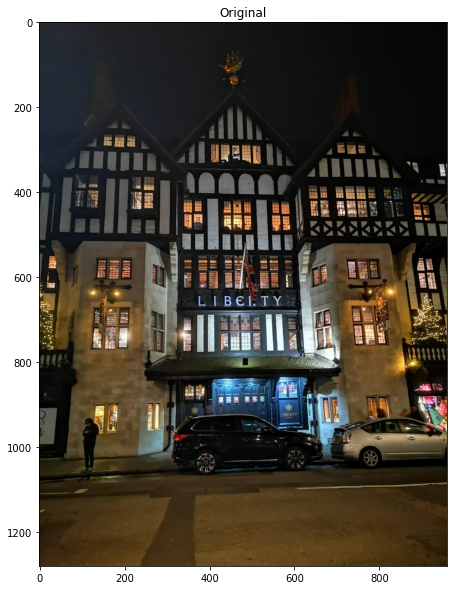

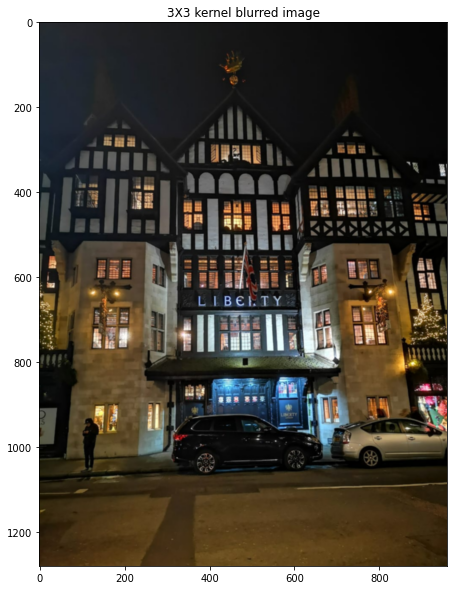

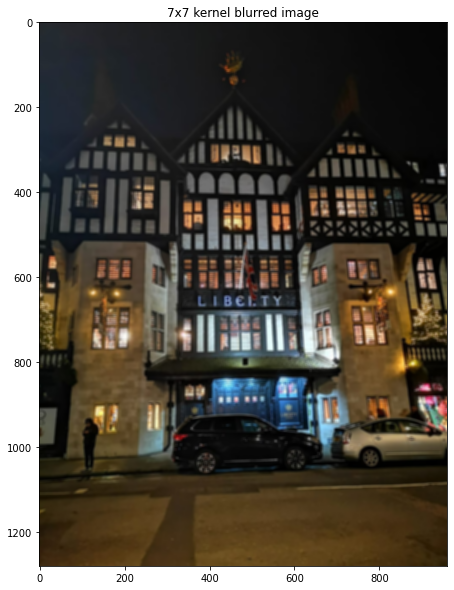

In [2]:
image = cv2.imread("/content/images/liberty.jpeg")
imshow("Original", image)

# Creating 3x3 kernel
kernel_3x3 = np.ones((3,3),np.float32) / 9
# apply kernel on image to blur it
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow("3X3 kernel blurred image", blurred)

# Creating 7x7 kernel
kernel_7x7 = np.ones((7,7),np.float32) / 49
# apply kernel on image to blur it
blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow("7x7 kernel blurred image", blurred2)

Other commonly used blurring methods in OpenCV:

*   Regular blur
*   Gaussian blur
* Median blur



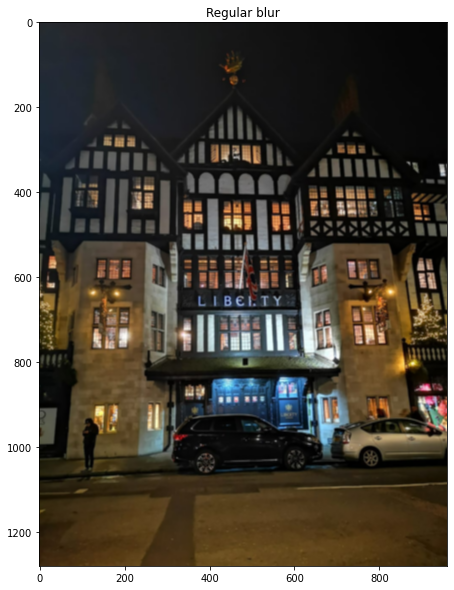

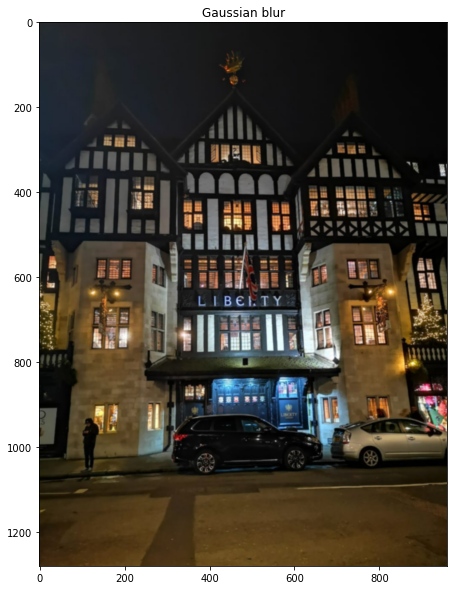

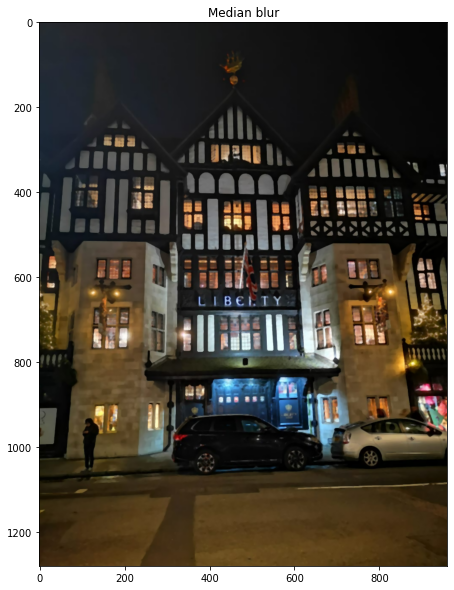

In [3]:
# regular blur
blur1 = cv2.blur(image, (5,5))
imshow("Regular blur", blur1)

# gaussian blur
blur2 = cv2.GaussianBlur(image, (5,5), 0)
imshow("Gaussian blur", blur2)

# median blur
blur3 = cv2.medianBlur(image, 5)
imshow("Median blur", blur3)

### Bilateral filter (Best for noise removal tasks)
```
dst = cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])
```
* **src**: source image
* **dst**: destination image as the same size and type as src
* **d**: Diameter of each pixel neibghbrhood that is used during filtering.
* **sigmaColor**: Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel nighbhorhood.
* **sigmaSpace**: Filter sigma in coordinates space.
* **borderType**: Border mode used to extrapolate pixels outside of the image.  



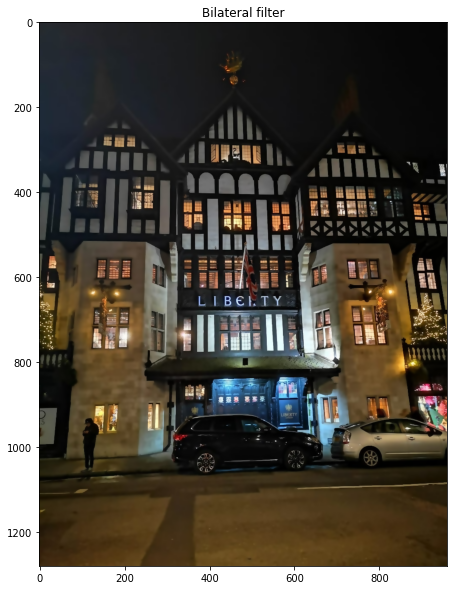

In [4]:
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow("Bilateral filter", bilateral)

### Image De-Noising


*   cv2.fastNlMeansDenoising() - works with a single grayscale image
*   cv2.fastNlMeansDenoisingColored() - works with a single colored image
*   cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in a short period of time.
*   cv2.fastNlMeansDenoisingColoredMulti() - Same as above but for colored images



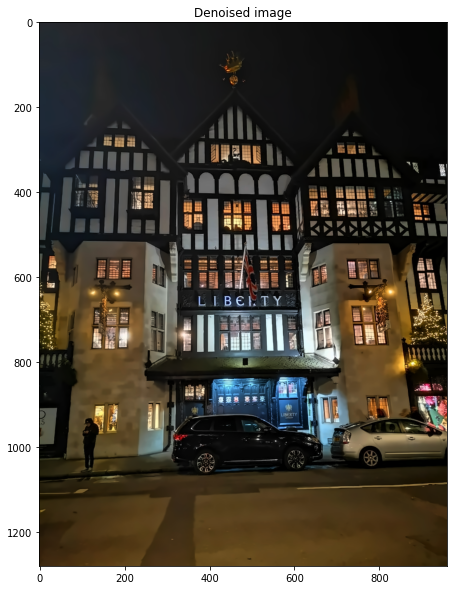

In [5]:

denoised = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
imshow("Denoised image", denoised)

### Sharpening

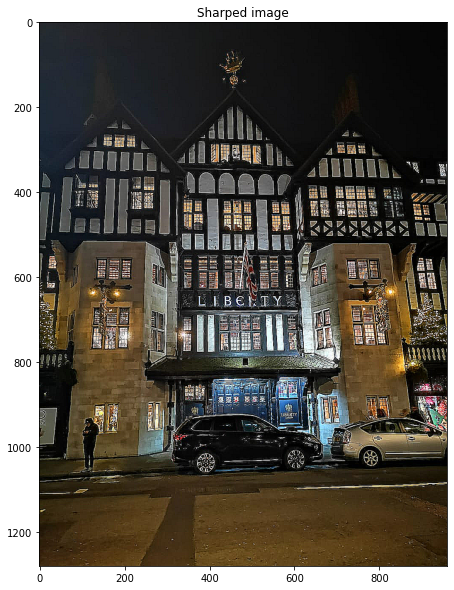

In [7]:

# create sharpening kernel, remember it must sum to 1
kernel = np.array([[-1, -1, -1],
          [-1, 9, -1],
          [-1, -1, -1]])

# apply sharpening kernel to the image
sharped = cv2.filter2D(image, -1, kernel)

imshow("Sharped image", sharped)